
Logistic Regression Probabilities (first 10):
[0.177 0.147 0.249 0.538 0.103 0.112 0.135 0.163 0.205 0.406]

Logistic Regression (Threshold = 0.5):
[[1552   55]
 [ 348   45]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.45      0.11      0.18       393

    accuracy                           0.80      2000
   macro avg       0.63      0.54      0.53      2000
weighted avg       0.74      0.80      0.75      2000

AUC Score: 0.7595625689770106

Random Forest Probabilities (first 10):
[0.04 0.08 0.19 0.14 0.06 0.   0.13 0.27 0.39 0.3 ]

Random Forest (Threshold = 0.5):
[[1546   61]
 [ 207  186]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.7649 - loss: 0.5830 - val_accuracy: 0.7994 - val_loss: 0.4987
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.8007 - loss: 0.5011 - val_accuracy: 0.8119 - val_loss: 0.4609
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.7959 - loss: 0.4855 - val_accuracy: 0.8169 - val_loss: 0.4361
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8024 - loss: 0.4603 - val_accuracy: 0.8238 - val_loss: 0.4202
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.8110 - loss: 0.4483 - val_accuracy: 0.8325 - val_loss: 0.4107
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.8183 - loss: 0.4364 - val_accuracy: 0.8388 - val_loss: 0.4063
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.8128 - loss: 0.4357 - val_accuracy: 0.8388 - val_loss: 0.4004
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.8138 - loss: 0.4395 - val_accurac

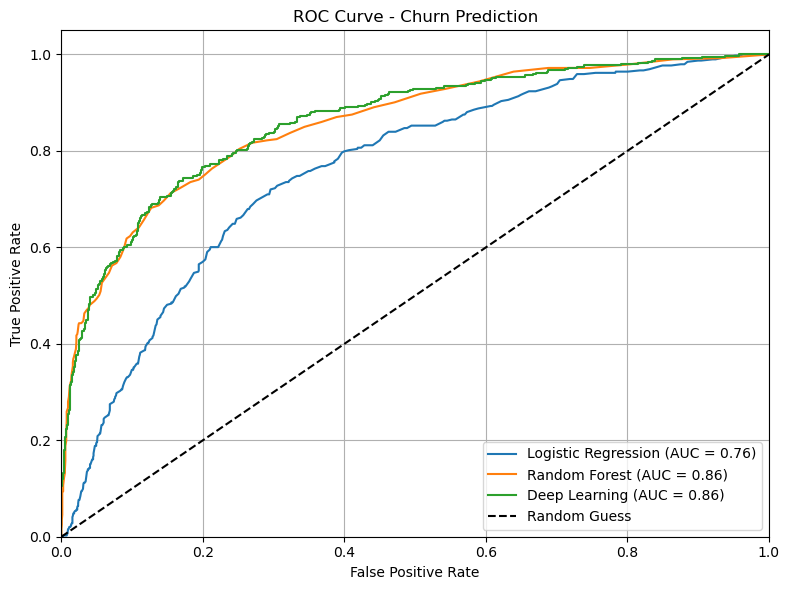

In [10]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

os.chdir("/Users/muskansohaney/Downloads")

df = pd.read_csv("Churn_Modelling.csv")
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

demo_features = ['Age', 'Gender', 'Geography_Germany', 'Geography_Spain']
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train[demo_features], y_train)
lr_probs = lr_model.predict_proba(X_test[demo_features])[:, 1]  # Probability of churn

print("\nLogistic Regression Probabilities (first 10):")
print(np.round(lr_probs[:10], 3))

lr_preds = (lr_probs >= 0.5).astype(int)
print("\nLogistic Regression (Threshold = 0.5):")
print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))
print("AUC Score:", roc_auc_score(y_test, lr_probs))

# Random Forest on all features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Probability of churn

print("\nRandom Forest Probabilities (first 10):")
print(np.round(rf_probs[:10], 3))

rf_preds = (rf_probs >= 0.5).astype(int)
print("\nRandom Forest (Threshold = 0.5):")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
print("AUC Score:", roc_auc_score(y_test, rf_probs))

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

y_train_dl = to_categorical(y_train)
y_test_dl = to_categorical(y_test)

model = Sequential([
    Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax')  # Probabilities for 2 classes
])

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_dl, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


loss, accuracy = model.evaluate(X_test_scaled, y_test_dl)
print(f"\nDeep Learning Model Accuracy: {accuracy:.4f}")

dl_probs = model.predict(X_test_scaled)
dl_churn_probs = dl_probs[:, 1]  # Probability of churn

print("\nDeep Learning Probabilities (first 10):")
print(np.round(dl_churn_probs[:10], 3))

dl_preds = (dl_churn_probs >= 0.5).astype(int)
print("\nDeep Learning (Threshold = 0.5):")
print(confusion_matrix(y_test, dl_preds))
print(classification_report(y_test, dl_preds))
print("AUC Score:", roc_auc_score(y_test, dl_churn_probs))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)


fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)


fpr_dl, tpr_dl, _ = roc_curve(y_test, dl_churn_probs)
roc_auc_dl = auc(fpr_dl, tpr_dl)


plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dl, tpr_dl, label=f'Deep Learning (AUC = {roc_auc_dl:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Churn Prediction')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
results_df = pd.DataFrame({
    'Actual_Exited': y_test.values,
    'LR_Prob': lr_probs,
    'RF_Prob': rf_probs,
    'DL_Prob': dl_churn_probs
})
results_df.to_csv("churn_prediction_probabilities.csv", index=False)
print("CSV file saved as 'churn_prediction_probabilities.csv'")

CSV file saved as 'churn_prediction_probabilities.csv'
